## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

In [2]:
df = pd.read_csv('stack_overflow_query_data.csv')

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,m,TagName,Unnamed: 2
2575,2024-01-01 00:00:00,php,1602
2576,2024-01-01 00:00:00,python,8506
2577,2024-01-01 00:00:00,r,1875
2578,2024-01-01 00:00:00,ruby,168
2579,2024-01-01 00:00:00,swift,944


Our dataset contains 3 columns namely **m**, **TagName** and **Unnamed: 2**. The first column contains timestamps with interval of 1 month. The second column contains tag name and the third column contains the number of times that particular language is tagged that month.

In [5]:
df.shape

(2580, 3)

Our dataset contains 2580 entries and has 3 columns which are already described above.

In [6]:
df.isnull().sum()

m             0
TagName       0
Unnamed: 2    0
dtype: int64

Hurray! there are no null values.

Let's rename the columns to make it more readable.

In [7]:
df.columns = ['timestamp', 'tag', 'count']

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

### How many months of data exist per language? Which language had the fewest months with an entry?


In [9]:
df['tag'].value_counts()

c#            187
assembly      186
c             186
c++           186
delphi        186
java          186
javascript    186
perl          186
php           186
python        186
ruby          186
r             184
swift         178
go            171
Name: tag, dtype: int64

As we suspected earlier, compared to c, swift is relatively new hence it appeared in 178 months while c appeared in 186 months. And c# appears in 187 months.

### Which programming language had the most number of posts since the creation of Stack Overflow?

In [11]:
df.groupby('tag')['count'].sum()\
.sort_values(ascending=False)

tag
javascript    2521838
python        2179734
java          1912967
c#            1610555
php           1462711
c++            804054
r              502629
c              402492
swift          332318
ruby           228827
go              72190
perl            68026
delphi          51654
assembly        43948
Name: count, dtype: int64

Cool! isn't it? Javascript being the most popular language appears 2.5 million times tagged since the creation of Stack Overflow

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
df['timestamp'].dtype

dtype('O')

as you can see the type of **timestamp** columns in **object**. So to convert to datetime we will use **pd.to_datetime()** method provided by pandas.

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2580 non-null   datetime64[ns]
 1   tag        2580 non-null   object        
 2   count      2580 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 60.6+ KB


## Data Manipulation



In [29]:
reshaped_df = df.pivot(index='timestamp', columns='tag', values='count')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [23]:
reshaped_df.shape

(187, 14)

The reshaped dataframe's shape indicates there are 187 timestamps(months) and 14 languages.

In [24]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

In [30]:
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [31]:
reshaped_df.count(axis=0)

tag
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
dtype: int64

The answer to this question is because some programming languages are relatively new therefore, in our reshaped dataframe those entries are replaced by NaN values and are not counted by `count()` method.

In [32]:
reshaped_df.fillna(0, inplace=True)

In [34]:
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
timestamp,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Posts')

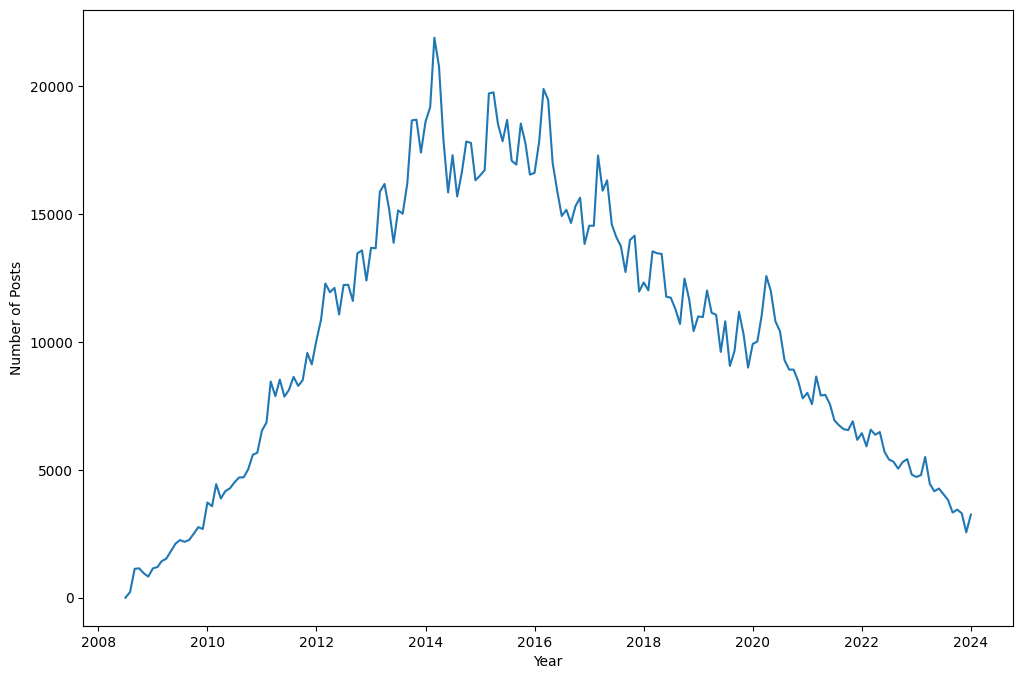

In [46]:
plt.figure(figsize=(12,8))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Year')
plt.ylabel('Number of Posts')

Wow! Can you see how the popularity of java is decline since 2016. What might be the reason?

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

Text(0, 0.5, 'Number of Posts')

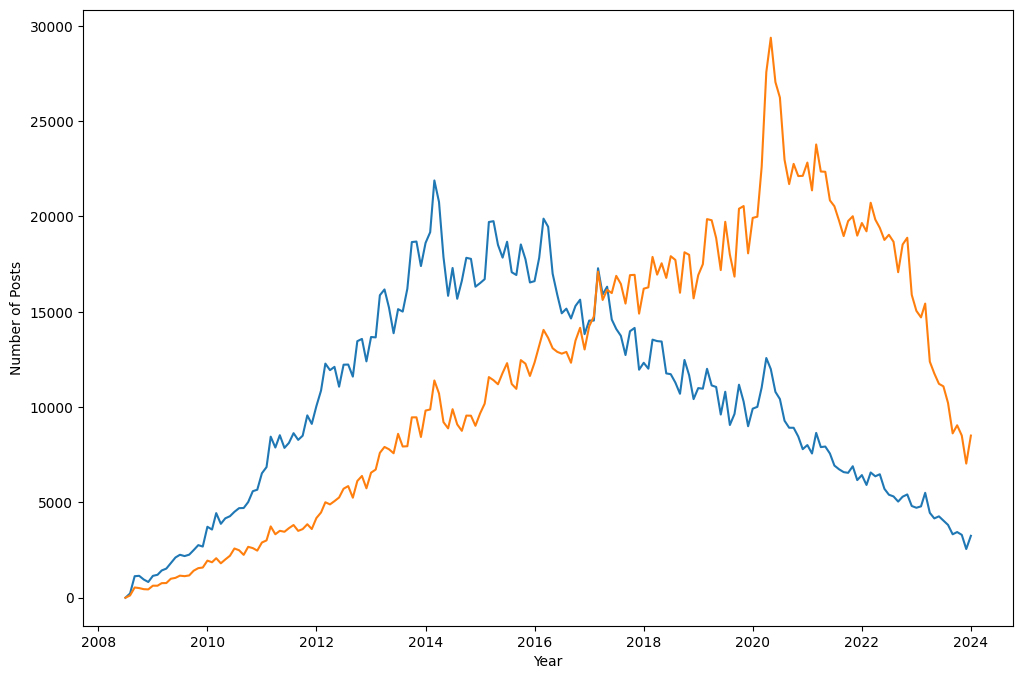

In [47]:
plt.figure(figsize=(12,8))
plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])
plt.xlabel('Year')
plt.ylabel('Number of Posts')

Strangely both python and java are experiencing a severe decline currently in 2024.

Let's now see this trend for all programming languages.

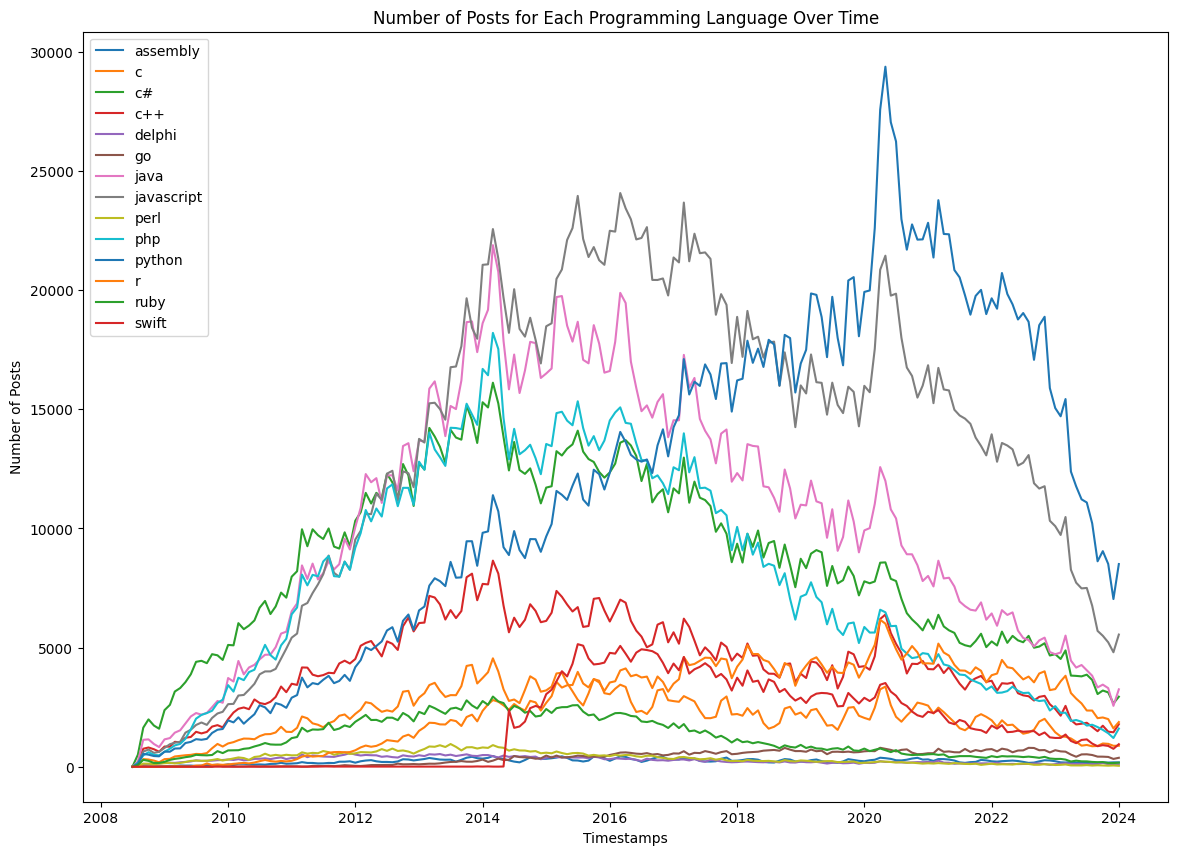

In [49]:
# Extract the list of programming languages
languages = reshaped_df.columns.tolist()
plt.figure(figsize=(14,10))
# Plot each programming language on a separate line with different colors
for language in languages:
    plt.plot(reshaped_df.index, reshaped_df[language], label=language)

# Add legend to the plot
plt.legend()

# Set labels for x and y axes
plt.xlabel('Timestamps')
plt.ylabel('Number of Posts')

# Set a title for the plot
plt.title('Number of Posts for Each Programming Language Over Time')

# Show the plot
plt.show()


Strangely all programming languages are experiencing decline. I suspect that people are not asking as much questions on stack overflow, probably because of AI tools like ChatGPT and Gemini.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

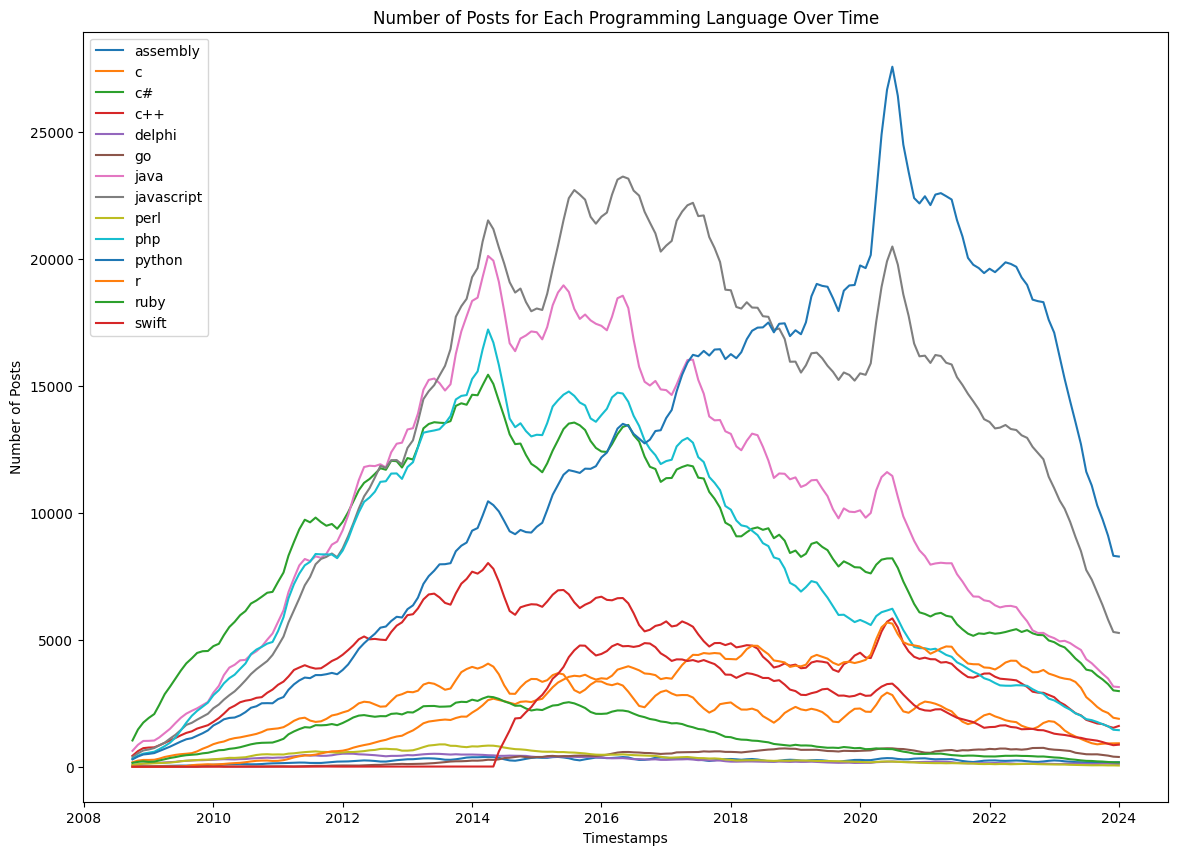

In [50]:
# Extract the list of programming languages
languages = reshaped_df.columns.tolist()
rolled_df = reshaped_df.rolling(window=4).mean()
# Set the figure size
plt.figure(figsize=(14,10))

# Plot each programming language on a separate line with different colors
for language in languages:
    plt.plot(rolled_df.index, rolled_df[language], label=language)

# Add legend to the plot
plt.legend()

# Set labels for x and y axes
plt.xlabel('Timestamps')
plt.ylabel('Number of Posts')

# Set a title for the plot
plt.title('Number of Posts for Each Programming Language Over Time')

# Show the plot
plt.show()


See the time stamps are now much apart. Because we set interval of width 4 months. You can play with `window` argument to smooth out the plot even further.